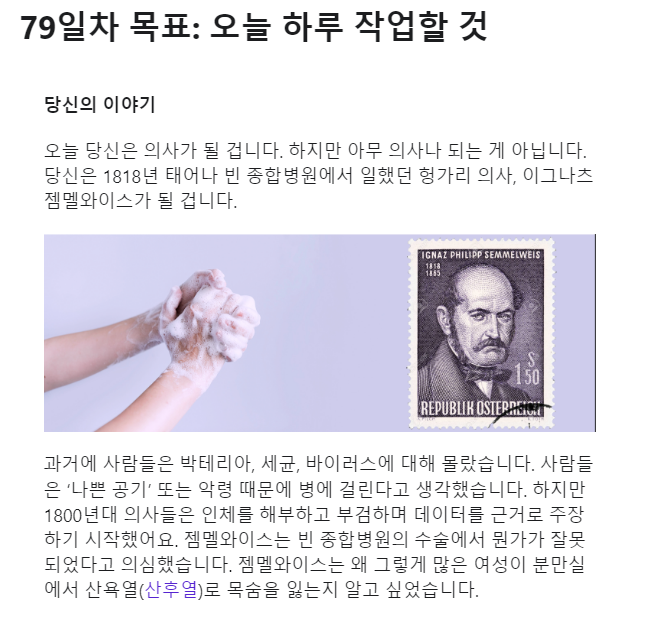

## `663강`
79일차 목표: 오늘 하루 작업할 것

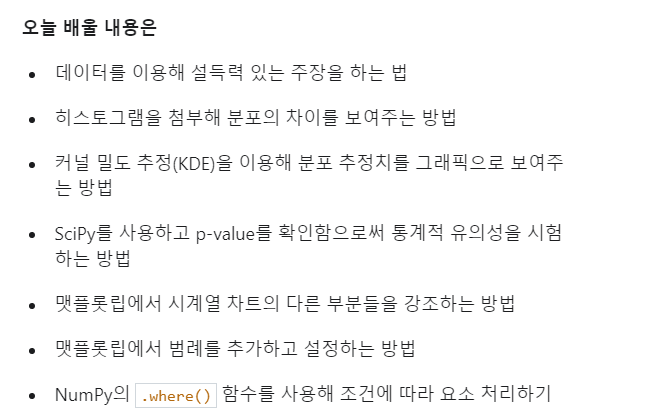

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
import os
os.listdir('data/')

['annual_deaths_by_clinic.csv', 'monthly_deaths.csv']

## `664강`
데이터 사전 탐구와 빈 병원의 출생자, 사망자 수 시각화하기

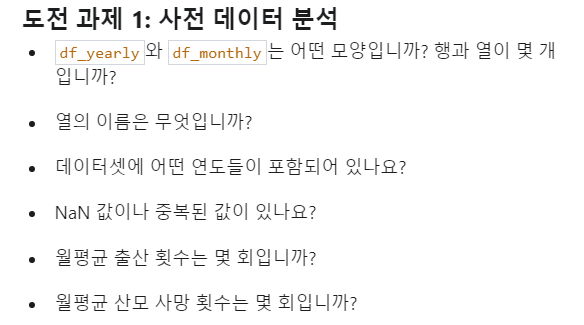

In [4]:
df_yearly = pd.read_csv('data/annual_deaths_by_clinic.csv')
df_monthly = pd.read_csv('data/monthly_deaths.csv')

In [6]:
print(df_yearly.shape)
print(df_monthly.shape)

(12, 4)
(98, 3)


In [8]:
print(df_yearly.columns)
print(df_monthly.columns)

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')
Index(['date', 'births', 'deaths'], dtype='object')


In [10]:
df_yearly.duplicated().sum()

0

In [11]:
df_monthly.duplicated().sum()

0

In [12]:
df_yearly.isnull().sum()

year      0
births    0
deaths    0
clinic    0
dtype: int64

In [13]:
df_monthly.isnull().sum()

date      0
births    0
deaths    0
dtype: int64

In [15]:
df_yearly.describe()

year       births      deaths
count    12.000000    12.000000   12.000000
mean   1843.500000  3152.750000  223.333333
std       1.783765   449.078476  145.383089
min    1841.000000  2442.000000   66.000000
25%    1842.000000  2901.750000  100.250000
50%    1843.500000  3108.500000  219.500000
75%    1845.000000  3338.250000  263.500000
max    1846.000000  4010.000000  518.000000

In [14]:
df_monthly.describe()

births     deaths
count   98.000000  98.000000
mean   267.000000  22.469388
std     41.769372  18.141031
min    190.000000   0.000000
25%    242.500000   8.000000
50%    264.000000  16.500000
75%    292.750000  36.750000
max    406.000000  75.000000

    - 매월 평균 267회의 출산과 22.47회의 산모 사망

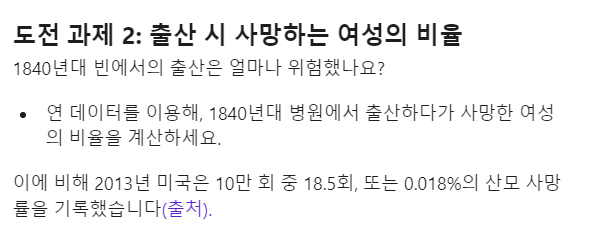

In [16]:
prob = df_yearly['deaths'].sum() / df_yearly['births'].sum() * 100
prob

7.083762852536147

    - 1840년대 약 7.08% 산모가 사망

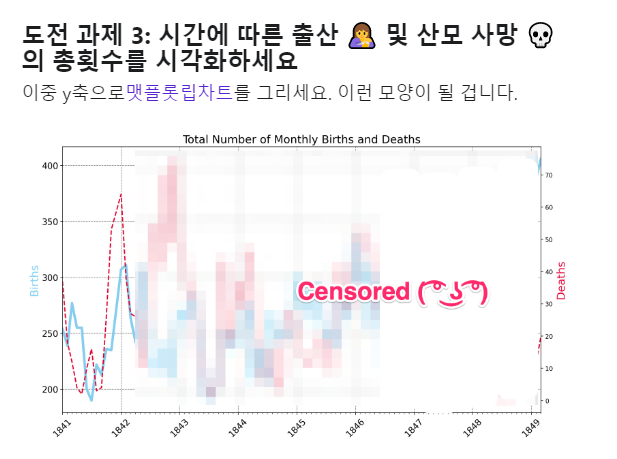
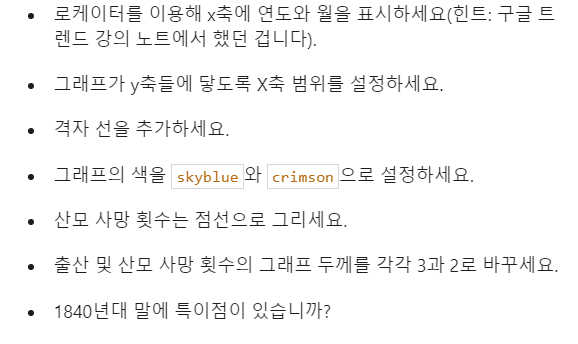

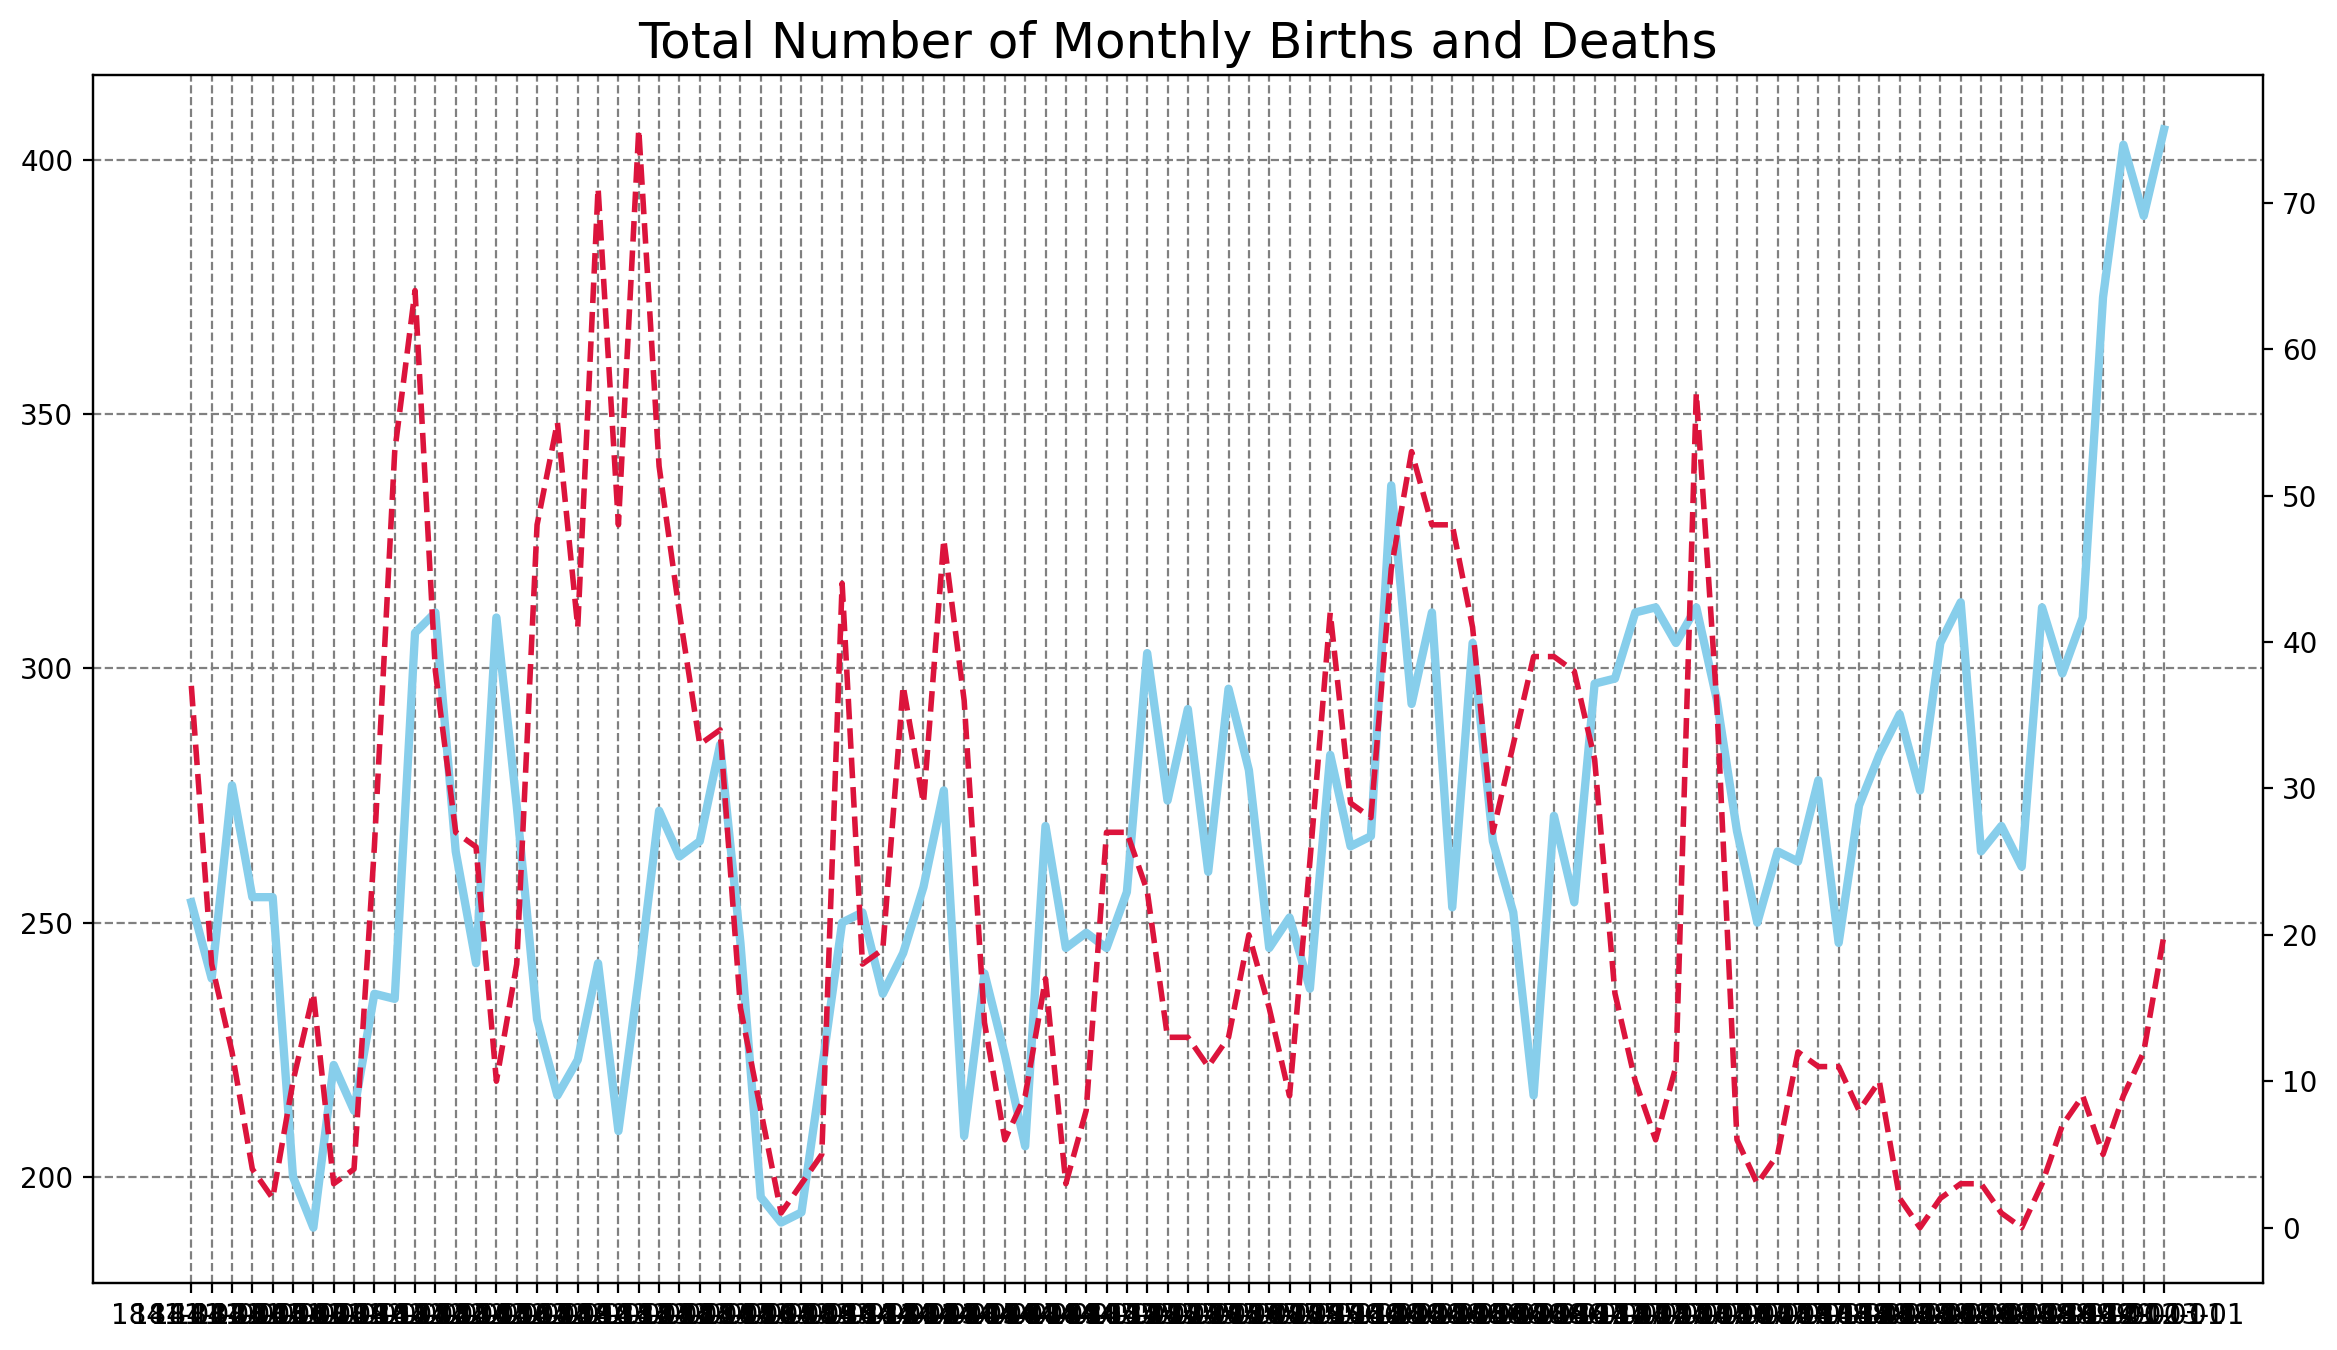

In [17]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.grid(color='grey', linestyle='--')
 
ax1.plot(df_monthly.date, 
         df_monthly.births, 
         color='skyblue', 
         linewidth=3)
 
ax2.plot(df_monthly.date, 
         df_monthly.deaths, 
         color='crimson', 
         linewidth=2, 
         linestyle='--')
 
plt.show()

In [19]:
import matplotlib.dates as mdates

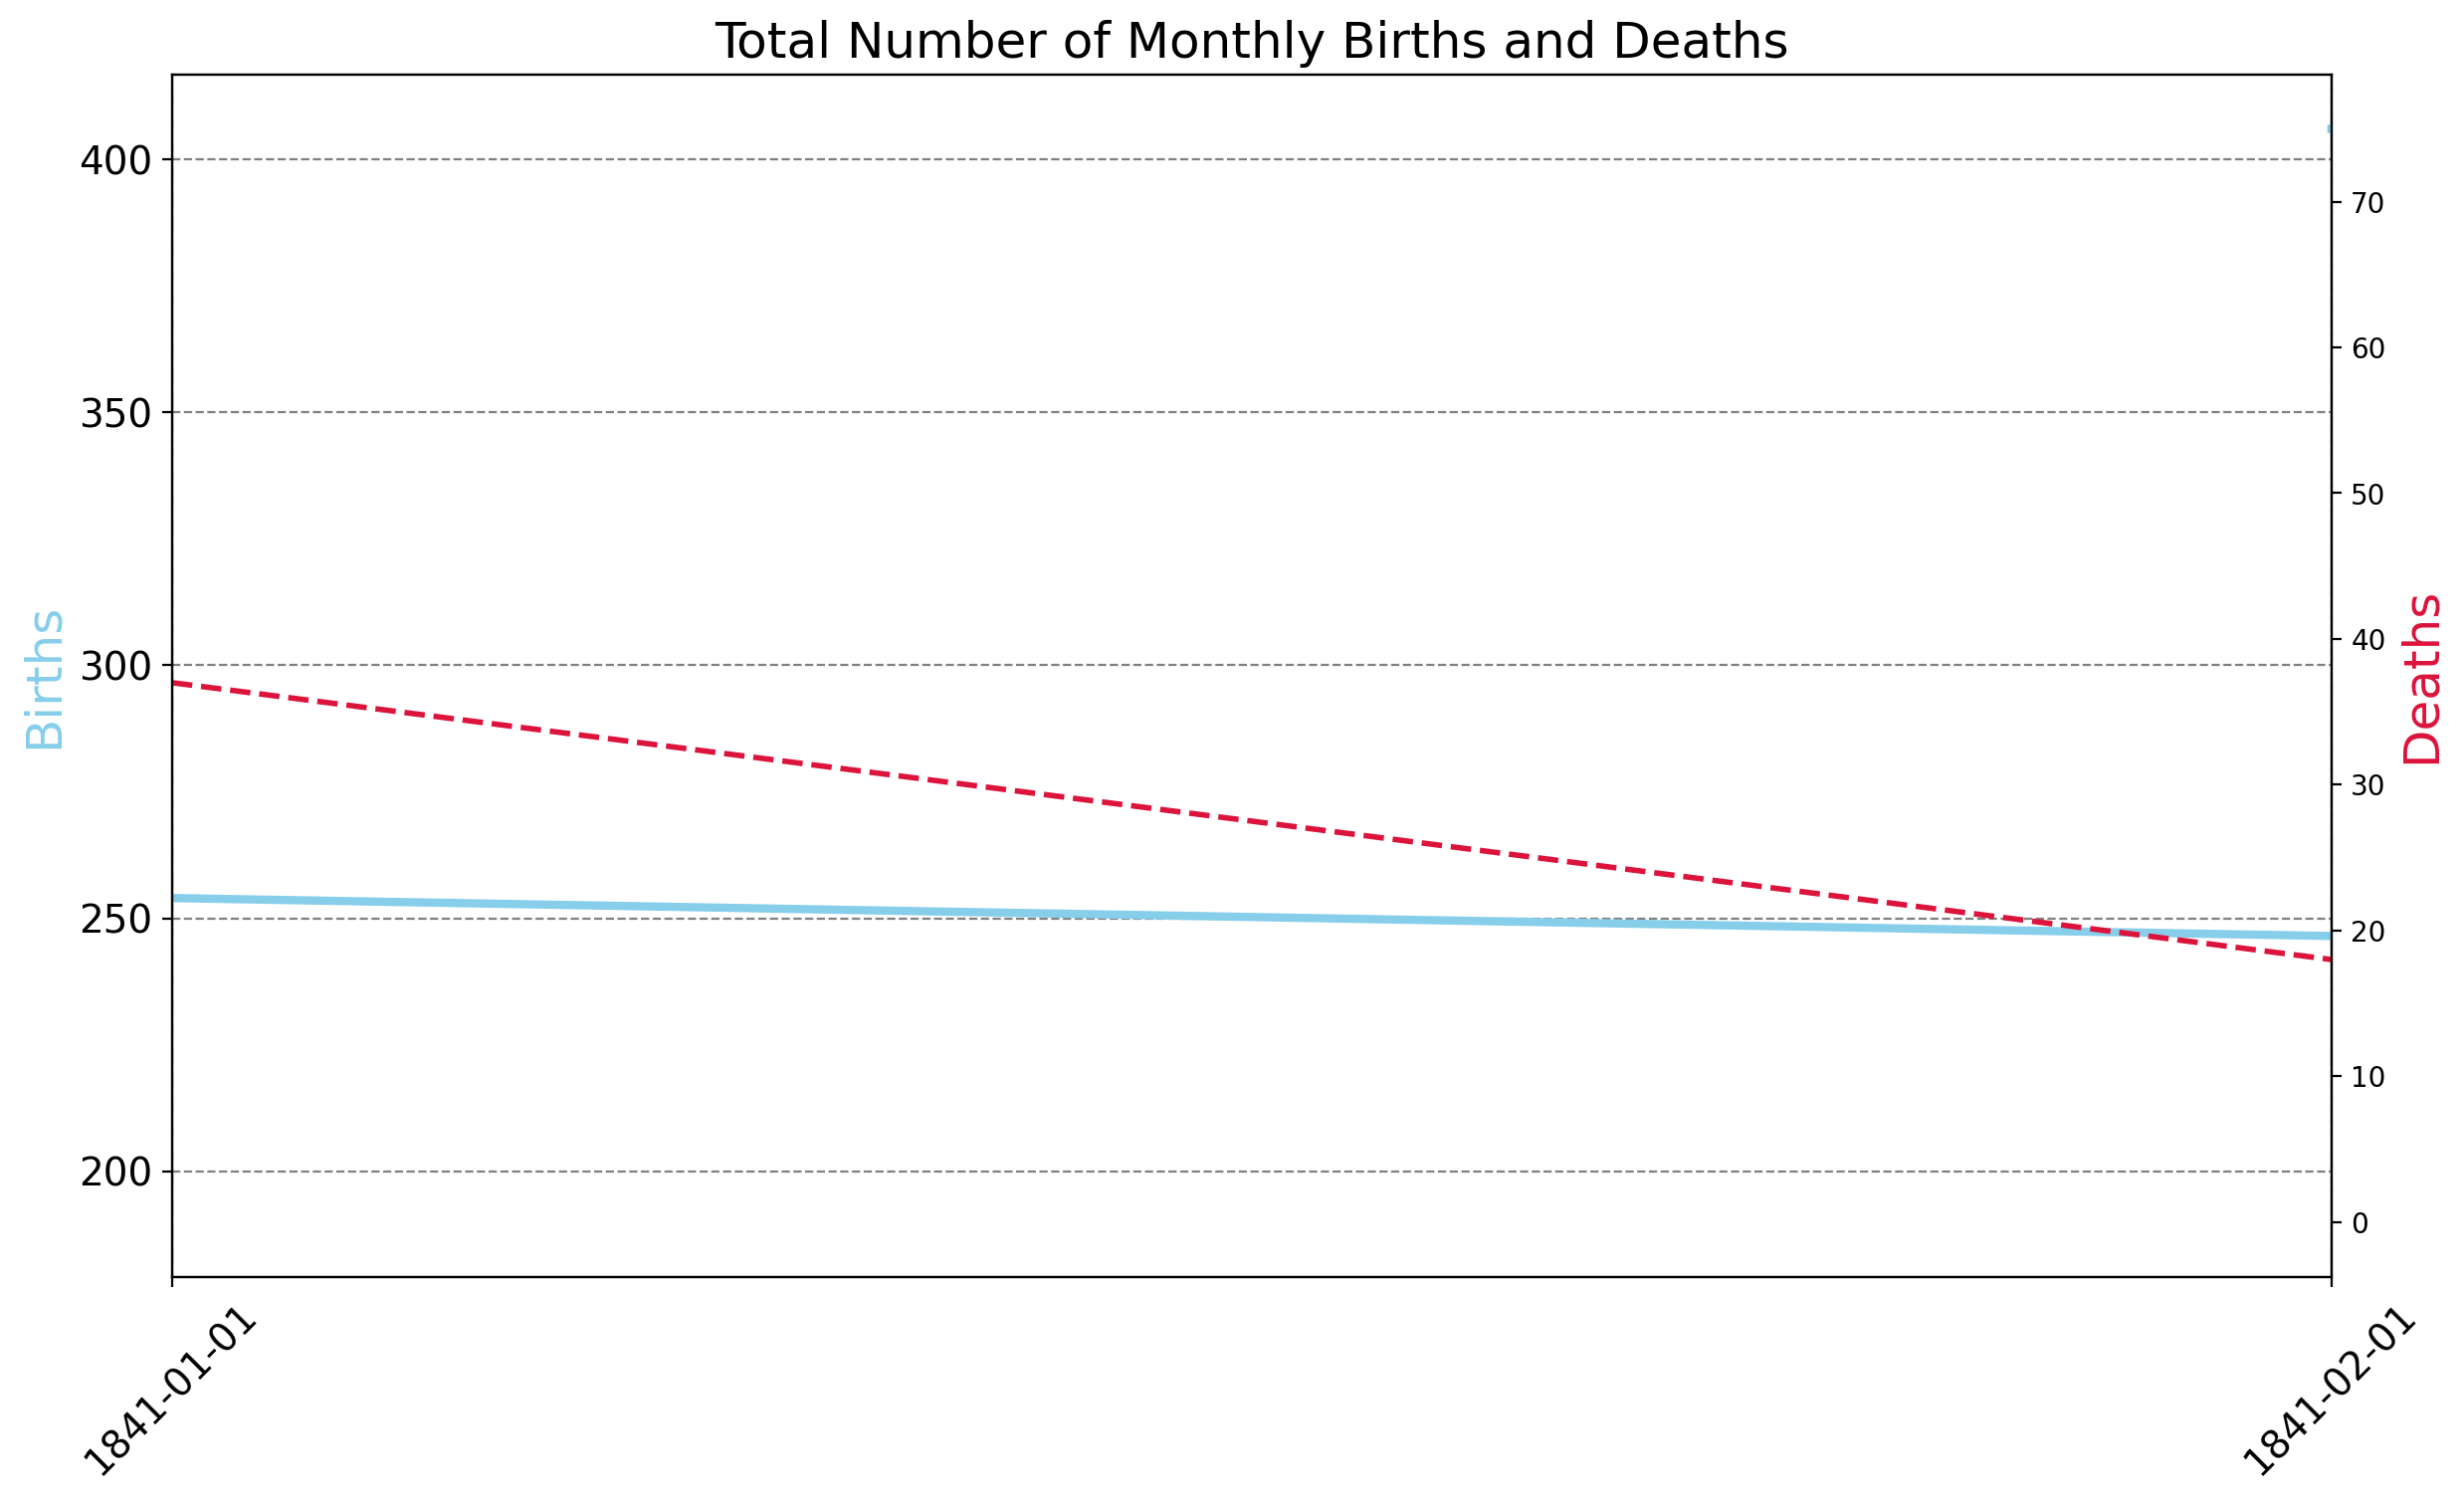

In [22]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('Births', color='skyblue', fontsize=18)
ax2.set_ylabel('Deaths', color='crimson', fontsize=18)
 
# Use Locators
ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.grid(color='grey', linestyle='--')
 
ax1.plot(df_monthly.date, 
         df_monthly.births, 
         color='skyblue', 
         linewidth=3)
 
ax2.plot(df_monthly.date, 
         df_monthly.deaths, 
         color='crimson', 
         linewidth=2, 
         linestyle='--')
 
plt.show()

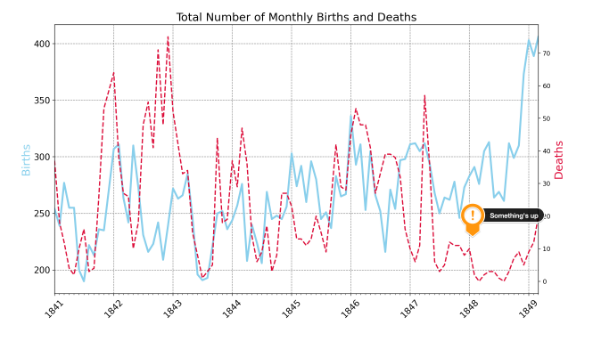

    - 1847년 이후 출산횟수가 늘어낫음에도 산모 사망 총수는 감소..?

## `665강`
병동에 따라 분리한 연 데이터 분석하기

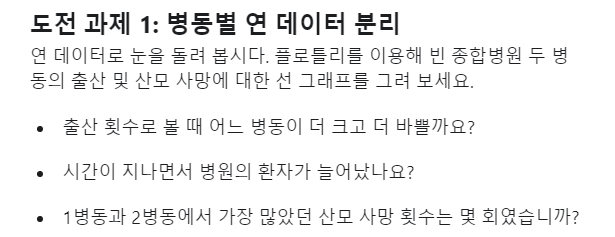

In [23]:
line = px.line(df_yearly, 
               x='year', 
               y='births',
               color='clinic',
               title='Total Yearly Births by Clinic')
 
line.show()

    - 해가 지날수록 병원에 출산 여성이 많아짐

In [24]:
line = px.line(df_yearly, 
               x='year', 
               y='deaths',
               color='clinic',
               title='Total Yearly Deaths by Clinic')
 
line.show()

    - 1병동에서 출산이 더 많아졌을 뿐 아니라 산모도 점점 더 많이 사망

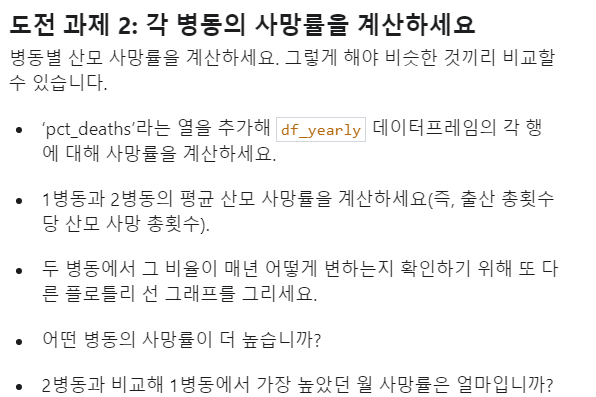

In [26]:
df_yearly['pct_deaths'] = df_yearly['deaths'] / df_yearly['births']
df_yearly.head(3)

year  births  deaths    clinic  pct_deaths
0  1841    3036     237  clinic 1    0.078063
1  1842    3287     518  clinic 1    0.157591
2  1843    3060     274  clinic 1    0.089542

In [27]:
# 1병동의 전체 기간 평균 사망률

clinic_1 = df_yearly[df_yearly.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100
print(f'Average death rate in clinic 1 is {avg_c1:.3}%.')

Average death rate in clinic 1 is 9.92%.


In [28]:
clinic_2 = df_yearly[df_yearly.clinic == 'clinic 2']
avg_c2 = clinic_2.deaths.sum() / clinic_2.births.sum() * 100
print(f'Average death rate in clinic 2 is {avg_c2:.3}%.')

Average death rate in clinic 2 is 3.88%.


In [29]:
line = px.line(df_yearly, 
               x='year', 
               y='pct_deaths',
               color='clinic',
               title='Proportion of Yearly Deaths by Clinic')
 
line.show()

    - 1842년은 1병동에서 약 16%의 산모가 죽고, 2병동에서는 약 7.6% 산모가 사망

## `666강`
손 씻기의 효과

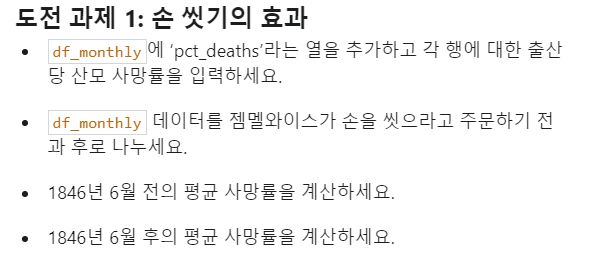

In [30]:
df_monthly['pct_deaths'] = df_monthly['deaths']/df_monthly['births']
df_monthly.head(3)

date  births  deaths  pct_deaths
0  1841-01-01     254      37    0.145669
1  1841-02-01     239      18    0.075314
2  1841-03-01     277      12    0.043321

In [58]:
handwashing_start = pd.Timestamp('1846-06')
handwashing_start

Timestamp('1846-06-01 00:00:00')

In [59]:
df_monthly['date'] = pd.to_datetime(df_monthly['date'])

In [60]:
before_washing = df_monthly[df_monthly['date'] <handwashing_start]
after_washing = df_monthly[df_monthly['date'] >= handwashing_start]

In [61]:
before_washing.head(3)

date  births  deaths  pct_deaths
0 1841-01-01     254      37    0.145669
1 1841-02-01     239      18    0.075314
2 1841-03-01     277      12    0.043321

In [62]:
after_washing.head(3)

date  births  deaths  pct_deaths
64 1846-06-01     266      27    0.101504
65 1846-07-01     252      33    0.130952
66 1846-08-01     216      39    0.180556

In [63]:
bw_rate = before_washing.deaths.sum() / before_washing.births.sum() * 100
aw_rate = after_washing.deaths.sum() / after_washing.births.sum() * 100
print(f'Average death rate before 1847 was {bw_rate:.4}%')
print(f'Average death rate AFTER 1847 was {aw_rate:.3}%')

Average death rate before 1847 was 10.6%
Average death rate AFTER 1847 was 4.87%


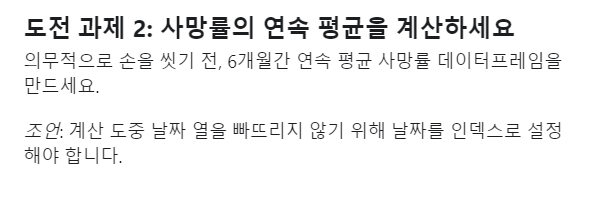

In [66]:
roll_df = before_washing.set_index('date')
roll_df = roll_df.rolling(window=6).mean()
roll_df.head(10)

births     deaths  pct_deaths
date                                         
1841-01-01         NaN        NaN         NaN
1841-02-01         NaN        NaN         NaN
1841-03-01         NaN        NaN         NaN
1841-04-01         NaN        NaN         NaN
1841-05-01         NaN        NaN         NaN
1841-06-01  246.666667  13.833333    0.056306
1841-07-01  236.000000  10.333333    0.046063
1841-08-01  233.166667   7.833333    0.035762
1841-09-01  222.500000   6.500000    0.031672
1841-10-01  219.333333  10.166667    0.047419

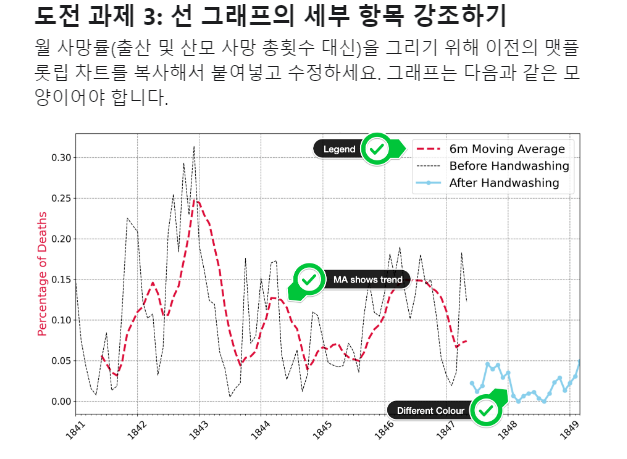
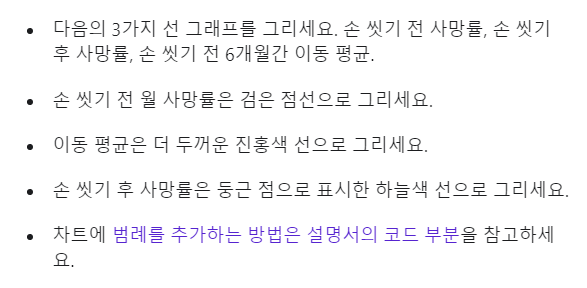

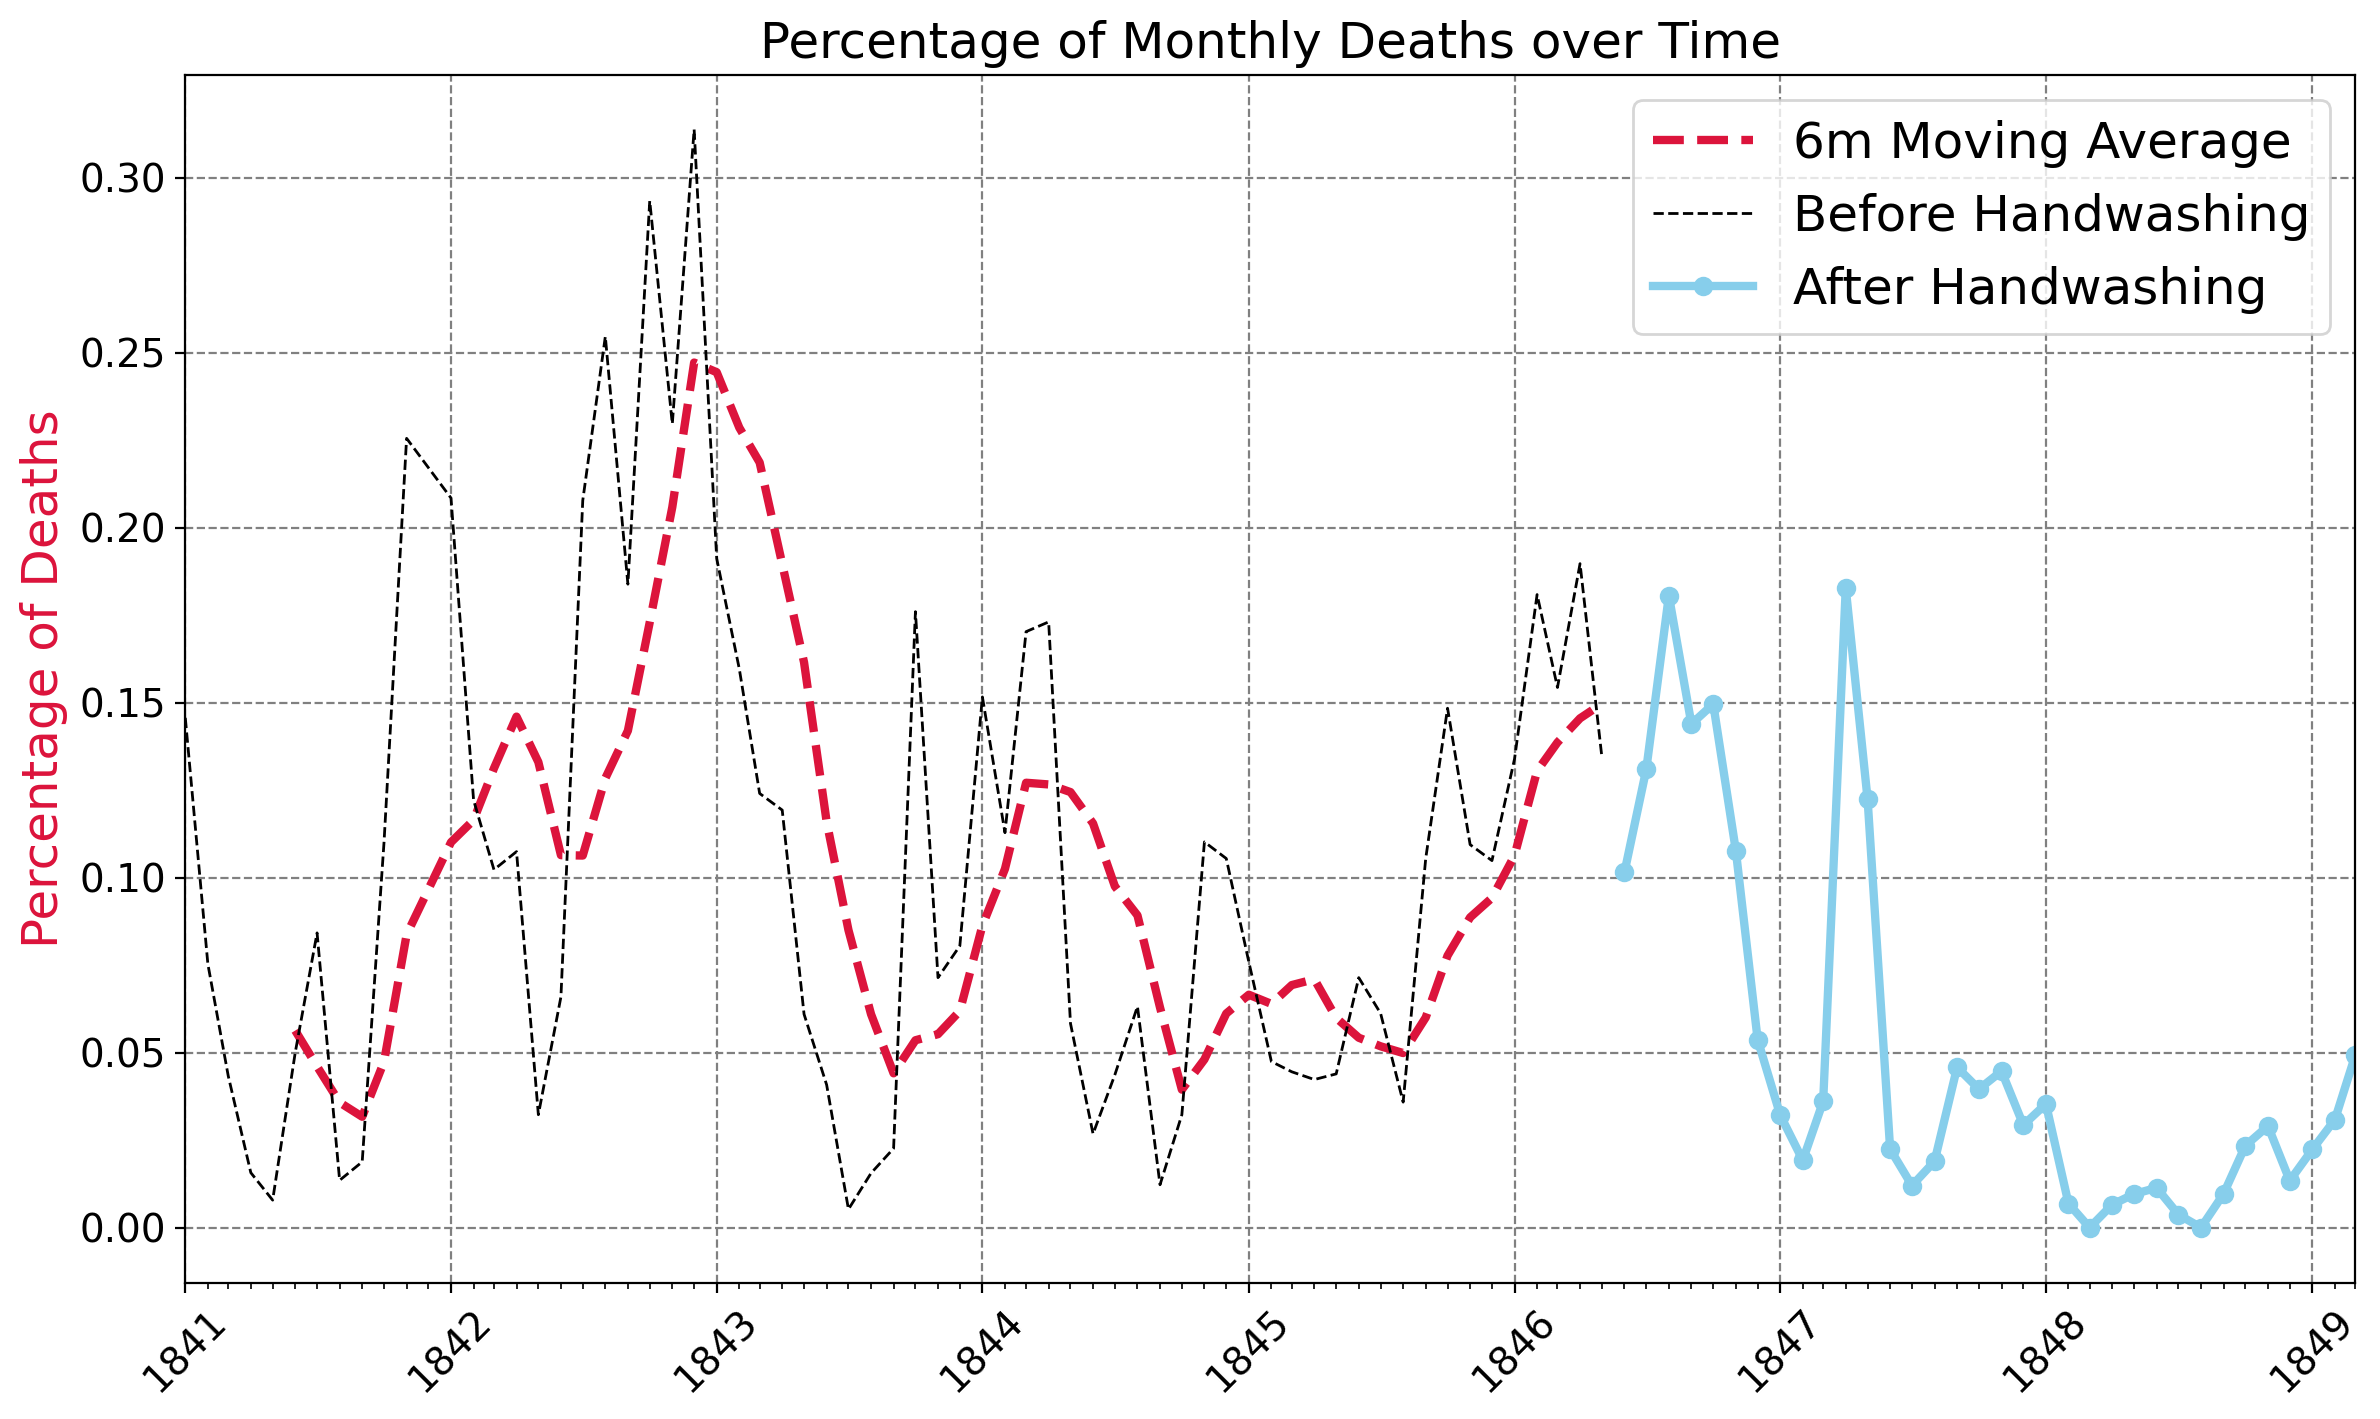

In [67]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)
 
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
 
plt.grid(color='grey', linestyle='--')
 
ma_line, = plt.plot(roll_df.index, 
                    roll_df.pct_deaths, 
                    color='crimson', 
                    linewidth=3, 
                    linestyle='--',
                    label='6m Moving Average')
bw_line, = plt.plot(before_washing.date, 
                    before_washing.pct_deaths,
                    color='black', 
                    linewidth=1, 
                    linestyle='--', 
                    label='Before Handwashing')
aw_line, = plt.plot(after_washing.date, 
                    after_washing.pct_deaths, 
                    color='skyblue', 
                    linewidth=3, 
                    marker='o',
                    label='After Handwashing')
 
plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)
 
plt.show()

## `667강`
분포를 시각화하고 통계적 유의성 검사하기

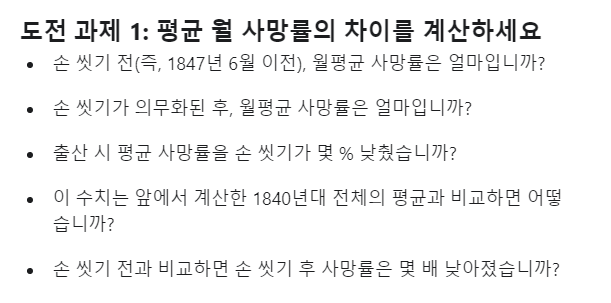

In [68]:
avg_prob_before = before_washing.pct_deaths.mean() * 100
print(f'Chance of death during childbirth before handwashing: {avg_prob_before:.3}%.')
 
avg_prob_after = after_washing.pct_deaths.mean() * 100
print(f'Chance of death during childbirth AFTER handwashing: {avg_prob_after:.3}%.')
 
mean_diff = avg_prob_before - avg_prob_after
print(f'Handwashing reduced the monthly proportion of deaths by {mean_diff:.3}%!')
 
times = avg_prob_before / avg_prob_after
print(f'This is a {times:.2}x improvement!')

Chance of death during childbirth before handwashing: 10.5%.
Chance of death during childbirth AFTER handwashing: 5.07%.
Handwashing reduced the monthly proportion of deaths by 5.43%!
This is a 2.1x improvement!


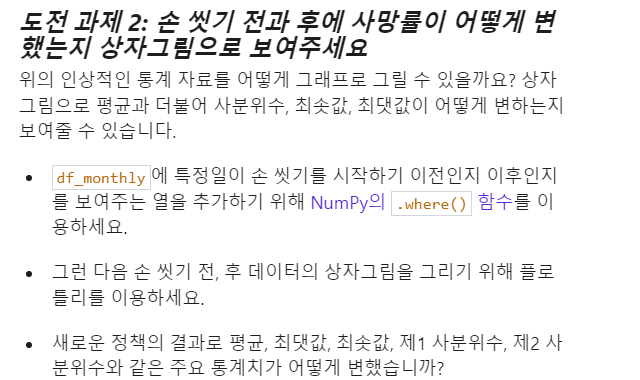

In [70]:
df_monthly['washing_hands'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')
df_monthly.head(3)

date  births  deaths  pct_deaths washing_hands
0 1841-01-01     254      37    0.145669            No
1 1841-02-01     239      18    0.075314            No
2 1841-03-01     277      12    0.043321            No

In [71]:
box = px.box(df_monthly, 
             x='washing_hands', 
             y='pct_deaths',
             color='washing_hands',
             title='How Have the Stats Changed with Handwashing?')
 
box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',)
 
box.show()

    - 1842년 말 사망 횟수의 급증
    - 30% 이상의 산모가 출산한 달에 병원에서 사망
    - 상자그림에서 평균 사망률이 어떻게 감소했는지 뿐 아니라 전체 범위가 감소한 것도 알 수 있음
    - 최대값 및 제3분위 수도 낮음

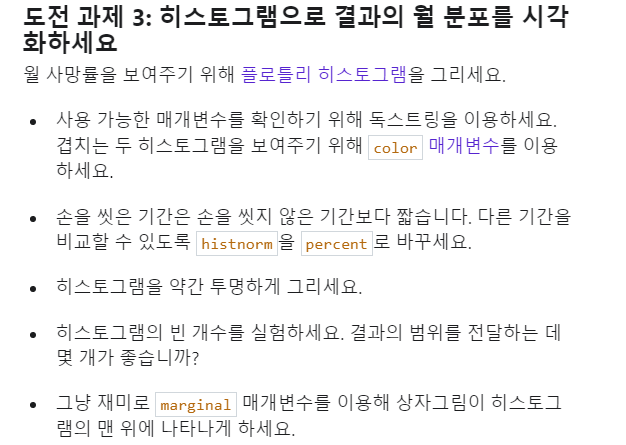

In [72]:
hist = px.histogram(df_monthly, 
                   x='pct_deaths', 
                   color='washing_hands',
                   nbins=30,
                   opacity=0.6,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',)
 
hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)
 
hist.show()

    - 데이터가 98개 정도라서, 히스토그램이 들쭉날쭉함

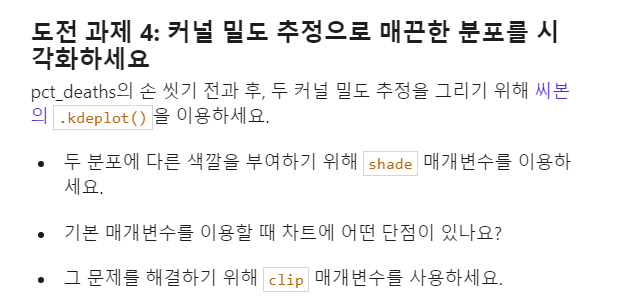

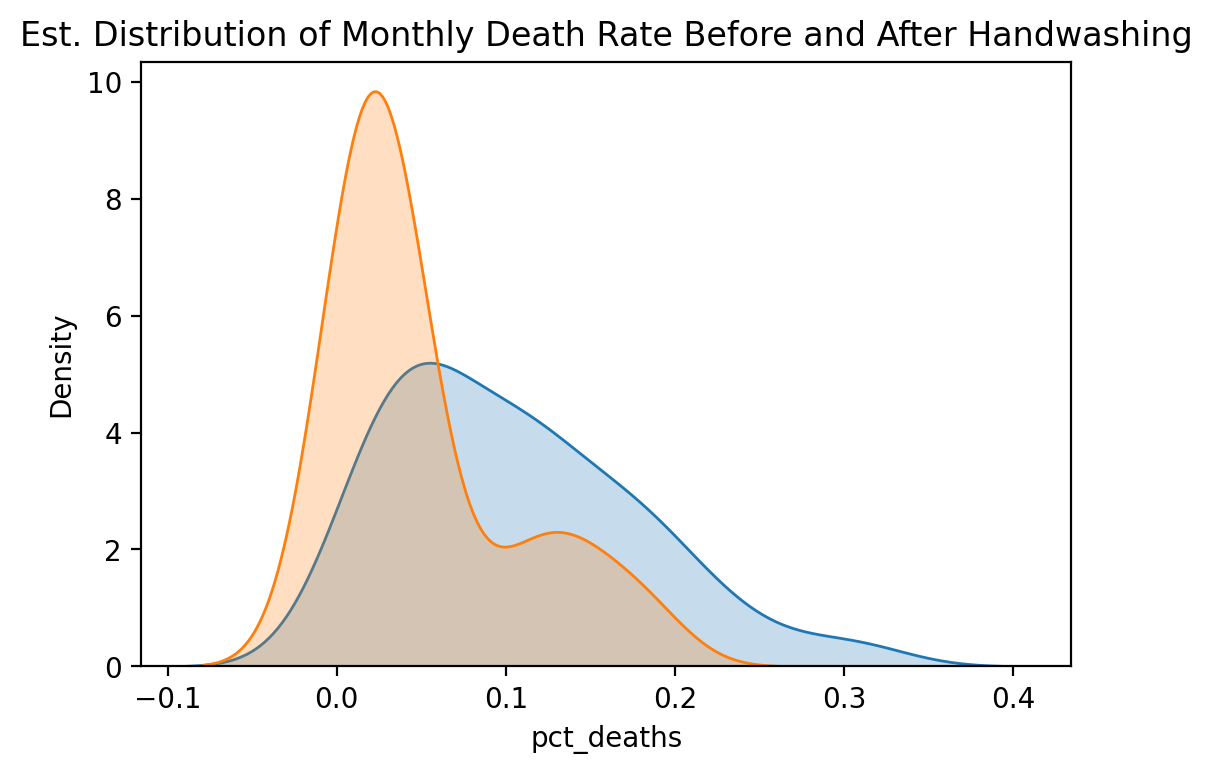

In [73]:
plt.figure(dpi=200)
# By default the distribution estimate includes a negative death rate!
sns.kdeplot(before_washing.pct_deaths, shade=True)
sns.kdeplot(after_washing.pct_deaths, shade=True)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.show()

    - 월 사망률 꼬리에서 음수가 나옴
    - 해결책 : 사망률의 하한선을 0으로 설정

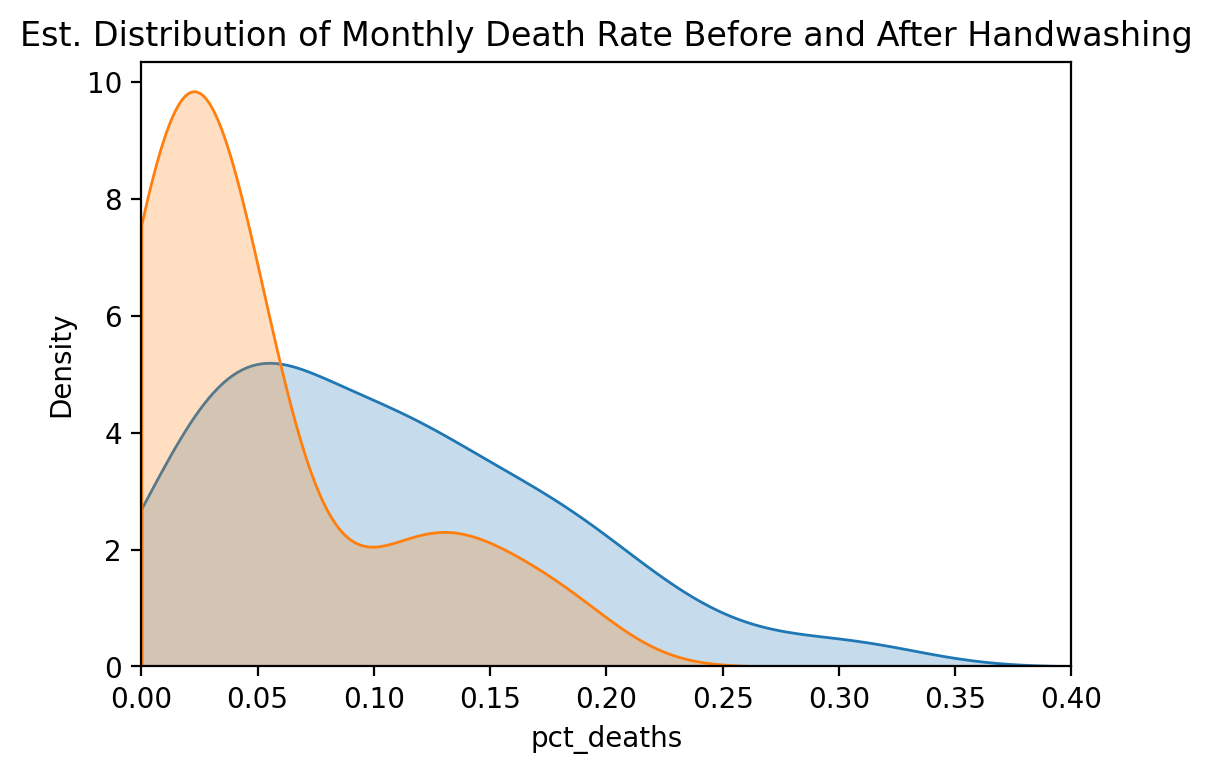

In [75]:
plt.figure(dpi=200)
sns.kdeplot(before_washing.pct_deaths, 
            shade=True,
            clip=(0,1))
sns.kdeplot(after_washing.pct_deaths, 
            shade=True,
            clip=(0,1))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)
plt.show()


    - 두 분포의 모양을 파악했으므로, 통계 검증을 통해 손씻기 주장에 대한 통계검증 수행
    - 분포가 우연에 의해 다르게 되었는지(낮은 사망률이 우연인지), 평균 사망률 8.4% 차이가 통계적으로 의미가 있는지

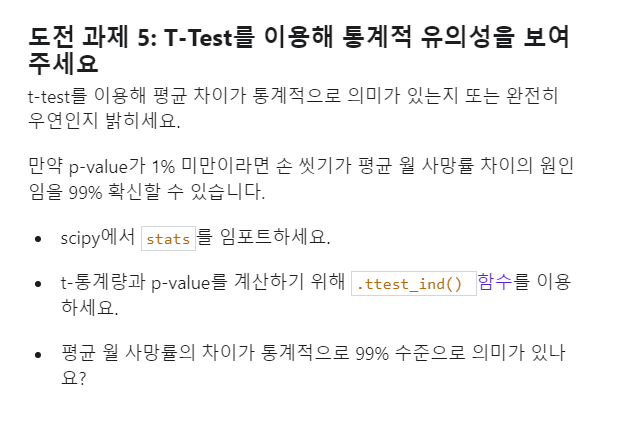

In [76]:
import scipy.stats as stats

In [77]:
t_stat, p_value = stats.ttest_ind(a=before_washing.pct_deaths, 
                                  b=after_washing.pct_deaths)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-palue is 0.0002504345
t-statstic is 3.804


    - p_value가 0.05 이하로, 통계적으로 유의미함

## `668강`
핵심 학습내용 및 요약

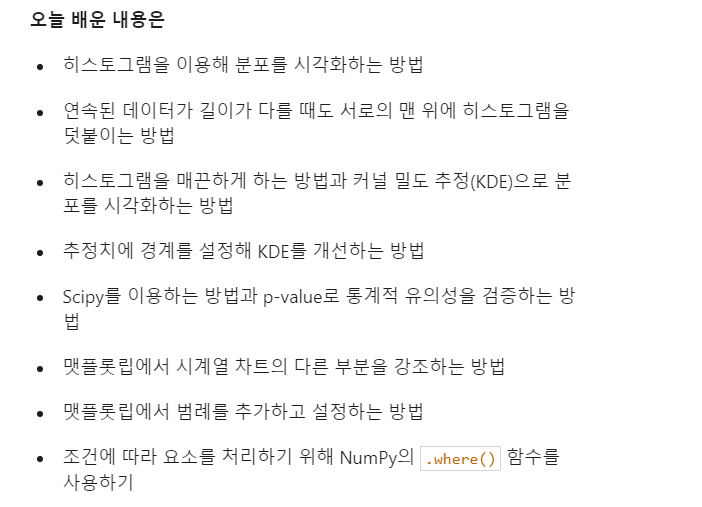